In [2]:
import re
import pandas as pd

In [3]:
path = r"C:\Users\hamza\Downloads\WhatsApp Chat with Crazy Engineers🤪.txt"

In [4]:
with open(path,'r',encoding='utf-8') as f:
    text=f.read()


In [5]:
pattern = r'\d{1,2}/\d{1,2}/\d{1,2},\s\d:\d{1,2}\s[APMapm]{2}\s-\s'

In [6]:
messages = re.split(pattern,text)[1:]


In [7]:
pattern2 = r'(\d{1,2}/\d{1,2}/\d{1,2},\s\d:\d{1,2}\u202f[APMapm]{2})'
dates=re.findall(pattern2,text)


In [8]:
dates_without_unicode = []

for date in dates:
    dates_without_unicode.append(date.replace('\u202f', ' '))

In [9]:
df = pd.DataFrame({'dates':dates_without_unicode,'messages':messages})

In [10]:
df['dates']=pd.to_datetime(df['dates'],format='%m/%d/%y, %I:%M %p')

In [11]:
msg= []
user=[]
for x in df['messages']:
    l = re.split('(\w+\s?\w+):\s', x)
    if l[1:]:
        user.append(l[1])
        msg.append(" ".join(l[2:]))
    else:
        user.append('notification')
        msg.append(l[0])


In [12]:
df.drop(columns=['messages'],inplace=True)

In [13]:
df['user']=user
df['messages']=msg

In [14]:
df['year']=df['dates'].dt.year
df['month_num']=df['dates'].dt.month
df['month']=df['dates'].dt.month_name()
df['day']=df['dates'].dt.day
df['day_name']=df['dates'].dt.day_name()
df['date']=df['dates'].dt.date
df['hour']=df['dates'].dt.hour
df['minutes']=df['dates'].dt.minute

In [15]:
df

,dates,user,messages,year,month_num,month,day,day_name,date,hour,minutes
0,2020-11-05 19:39:00,notification,Messages and calls are end-to-end encrypted. N...,2020,11,November,5,Thursday,2020-11-05,19,39
1,2020-11-05 19:39:00,notification,"CR Arsalan created group ""Students only""\n",2020,11,November,5,Thursday,2020-11-05,19,39
2,2020-11-05 19:39:00,notification,CR Arsalan added you\n,2020,11,November,5,Thursday,2020-11-05,19,39
3,2020-11-05 19:39:00,320 4017843,Ok\n,2020,11,November,5,Thursday,2020-11-05,19,39
4,2020-11-05 19:39:00,302 1146957,Ya kon sa group bana lya ha manhosooo\n,2020,11,November,5,Thursday,2020-11-05,19,39
...,...,...,...,...,...,...,...,...,...,...,...
18061,2024-02-19 20:51:00,Sani Lgu,<Media omitted>\n,2024,2,February,19,Monday,2024-02-19,20,51
18062,2024-02-19 21:06:00,Toor LGU,Miss ko kaho mids ki list bhi share krdien\n2/...,2024,2,February,19,Monday,2024-02-19,21,6
18063,2024-02-20 15:32:00,313 5762621,AI k sir ajj mujhy mile the unhon ne kaha pape...,2024,2,February,20,Tuesday,2024-02-20,15,32
18064,2024-02-20 19:47:00,317 4050796,<Media omitted>\n,2024,2,February,20,Tuesday,2024-02-20,19,47


In [16]:
new_df=df[['user','messages']]
new_df

,user,messages
0,notification,Messages and calls are end-to-end encrypted. N...
1,notification,"CR Arsalan created group ""Students only""\n"
2,notification,CR Arsalan added you\n
3,320 4017843,Ok\n
4,302 1146957,Ya kon sa group bana lya ha manhosooo\n
...,...,...
18061,Sani Lgu,<Media omitted>\n
18062,Toor LGU,Miss ko kaho mids ki list bhi share krdien\n2/...
18063,313 5762621,AI k sir ajj mujhy mile the unhon ne kaha pape...
18064,317 4050796,<Media omitted>\n


In [17]:
new_df2 = new_df[new_df['messages']!='<Media omitted>\n']
new_df2

,user,messages
0,notification,Messages and calls are end-to-end encrypted. N...
1,notification,"CR Arsalan created group ""Students only""\n"
2,notification,CR Arsalan added you\n
3,320 4017843,Ok\n
4,302 1146957,Ya kon sa group bana lya ha manhosooo\n
...,...,...
18056,317 4050796,list mangwao\n
18060,Sani Lgu,Review time ap log Ka 9 bje hai\n
18062,Toor LGU,Miss ko kaho mids ki list bhi share krdien\n2/...
18063,313 5762621,AI k sir ajj mujhy mile the unhon ne kaha pape...


In [18]:
x= df['user'].value_counts().head()

In [19]:
x

user
GR LGU            1339
Abdul SamadLGU    1239
003 Lgu           1140
Ahmad Lgu         1065
CR Arsalan         802
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

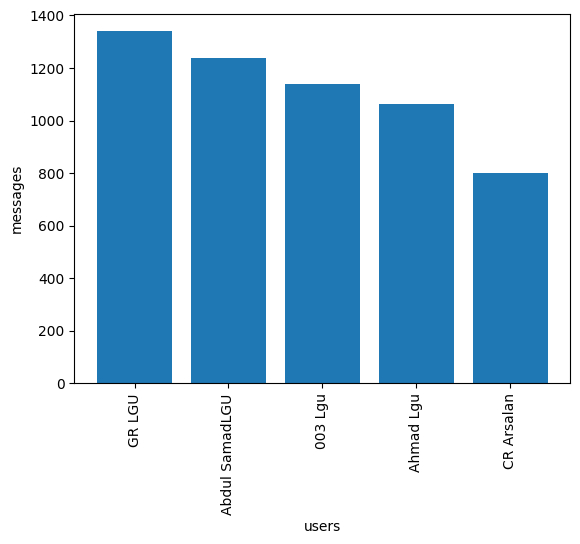

In [21]:
names = x.index
count = x.values
plt.xlabel('users')
plt.ylabel('messages')
plt.xticks(rotation='vertical')
plt.bar(names,count )

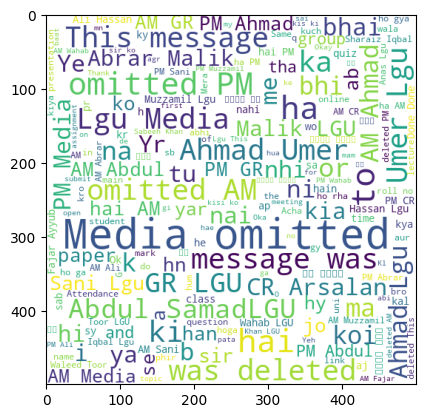

In [52]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
path=r"D:\usama javed\Machine Learning Projects\whatsapp chat analyzer\whatsapp_chat_analyzer_app\NLTK's list of english stopwords"
with open(path,'r',encoding='utf-8') as f:
    file = f.read()
splitted_file =file.split("\n")
splitted_file.append('<Media')
stopword='Umer'
tokenized_text = word_tokenize(" ".join(new_df2['messages']))
wordcloud = WordCloud(height=500,width=500,min_font_size=10,background_color='white',stopwords=stopword)
wc = wordcloud.generate(" ".join(tokenized_text))

fig,ax = plt.subplots()
ax.imshow(wc)

In [41]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [53]:
if stopword in tokenized_text:
    print('present')


present


In [51]:
new_df2[new_df2['messages']=='<Media']

,user,messages


In [57]:
tokenized_text

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted',
 '.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat',
 ',',
 'not',
 'even',
 'WhatsApp',
 ',',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them',
 '.',
 'Tap',
 'to',
 'learn',
 'more',
 '.',
 'CR',
 'Arsalan',
 'created',
 'group',
 '``',
 'Students',
 'only',
 "''",
 'CR',
 'Arsalan',
 'added',
 'you',
 'Ok',
 'Ya',
 'kon',
 'sa',
 'group',
 'bana',
 'lya',
 'ha',
 'manhosooo',
 'Ya',
 'imran',
 'kon',
 'ha',
 'Kindly',
 'tameez',
 'ka',
 'khyal',
 'rkhy',
 'Girls',
 'bhi',
 'hn',
 'es',
 'group',
 'mn',
 'Oh',
 'khair',
 'To',
 'btao',
 'na',
 'bhai',
 'Roll',
 'no',
 '022',
 'Is',
 'ma',
 'krna',
 'kya',
 'ha',
 'Ye',
 'full',
 'class',
 'ka',
 'group',
 'hai',
 '?',
 'G',
 'Okay',
 'Welcome',
 'everyone',
 'G',
 'Oh',
 'saiii',
 'Full',
 'class',
 'hogi',
 'Welcome',
 'to',
 'homeeee',
 'Saii',
 'Muhammad',
 'Naeem',
 'left',
 '🥰💯',
 '@',
 '923334142624',
 'ap',
 'apny',
 'group',
 'ky',
 'participants',
 'ky